### Project Description
- The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 14,000 power plants from 3 countries(USA, AUS, INDIA) and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.


#### Key attributes of the database
The database includes the following indicators:
- `country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
- `country_long` (text): longer form of the country designation
- `name` (text): name or title of the power plant, generally in Romanized form
- `gppd_idnr` (text): 10 or 12 character identifier for the power plant
- `capacity_mw` (number): electrical generating capacity in megawatts
- `latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
- `longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
- `primary_fuel` (text): energy source used in primary electricity generation or export
- `other_fuel1` (text): energy source used in electricity generation or export
- `other_fuel2` (text): energy source used in electricity generation or export
- `other_fuel3` (text): energy source used in electricity generation or export
- `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
- `owner` (text): majority shareholder of the power plant, generally in Romanized form
- `source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
- `url` (text): web document corresponding to the `source` field
- `geolocation_source` (text): attribution for geolocation information
- `wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
- `year_of_capacity_data` (number): year the capacity information was reported
- `generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
- `generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
- `generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
- `generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
- `generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
- `generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
- `generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
- `generation_data_source` (text): attribution for the reported generation information
- `estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
- `estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
- `estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
- `estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
- `estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
- `estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
- `estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
- `estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
- `estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
- `estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 

### Prediction :   
- Make two predictions  1) Primary Fuel    2) capacity_mw 

### Dataset Link:

- https://github.com/FlipRoboTechnologies/ML_-Datasets/tree/main/Global%20Power%20Plant%20Database


In [2580]:
# Import the libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error,accuracy_score

## Read and understand data set

In [2581]:
os.chdir("F:\FlipRobo\Project Evaluation\Global Power Plant Database")

In [2582]:
df_AUS=pd.read_csv("database_AUS.csv")
df_IND=pd.read_csv("database_IND.csv")
df_USA=pd.read_csv("database_USA.csv")

In [2583]:
df_AUS.shape

(512, 27)

In [2584]:
df_AUS.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,AUS,Australia,Adelaide Airport,AUS0000433,0.11,-34.9387,138.5377,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AUS,Australia,Adelaide Showgrounds,AUS0000432,1.00,-34.9453,138.5882,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AUS,Australia,Albany Wind Farm,AUS0000065,21.60,-35.0641,117.7977,Wind,NaN,NaN,...,2019.0,89.595278,102.642778,96.555556,95.872778,85.900278,92.682222,NaN,Australia Clean Energy Regulator,NaN
3,AUS,Australia,Alice Springs Airport,AUS0000469,0.24,-23.7966,133.8971,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AUS,Australia,Amcor Gawler,AUS0000231,4.00,-34.5509,138.7659,Oil,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2585]:
df_IND.shape

(907, 27)

In [2586]:
df_USA.shape

(11879, 27)

In [2587]:
df_AUS.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [2588]:
df_IND.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [2589]:
df_USA.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

#### Observation:
- All the three datasests have the same variables.

#### Next:
- Concatenating the data sets for AUS, IND and USA row wise

In [2590]:
df=pd.concat([df_AUS,df_IND,df_USA],axis=0)

In [2591]:
df.shape

(13298, 27)

#### Observation: 

- The number of rows of the concatenated dataset is the sum total of the rows of each individual datasets, whereas the number of columns is same as that of each of the individual datasets.
- Now, we can say that the datasets have been concatenated properly.

#### Next:

- Visualize first 5 rows of the concatenated dataset.

In [2592]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,AUS,Australia,Adelaide Airport,AUS0000433,0.11,-34.9387,138.5377,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AUS,Australia,Adelaide Showgrounds,AUS0000432,1.00,-34.9453,138.5882,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AUS,Australia,Albany Wind Farm,AUS0000065,21.60,-35.0641,117.7977,Wind,NaN,NaN,...,2019.0,89.595278,102.642778,96.555556,95.872778,85.900278,92.682222,NaN,Australia Clean Energy Regulator,NaN
3,AUS,Australia,Alice Springs Airport,AUS0000469,0.24,-23.7966,133.8971,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AUS,Australia,Amcor Gawler,AUS0000231,4.00,-34.5509,138.7659,Oil,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Exploratory Data Analysis

### (i) Check for variable data type:

In [2593]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                  object
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019          object
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

#### Observations:
- Categorical variables: 'country', 'country_long', 'name', 'gppd_idnr', 'primary_fuel', 'other_fuel1', 'other_fuel2', 'other_fuel3', 'owner','source', 'url', 'geolocation_source', 'generation_gwh_2019' and 'generation_data_source'


- Numerical variables:'capacity_mw', 'latitude', 'longitude', 'commissioning_year', 'wepp_id', 'year_of_capacity_data', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', and 'estimated_generation_gwh'

#### 'generation_gwh_2019' is of wrong data type. It should be numerical variable.

### (ii) Check for Missing Values:

In [2594]:
df.isnull().sum()

country                         0
country_long                    0
name                            0
gppd_idnr                       0
capacity_mw                     6
latitude                       78
longitude                      78
primary_fuel                 2004
other_fuel1                 11670
other_fuel2                 13028
other_fuel3                 13206
commissioning_year           2644
owner                         593
source                          0
url                             0
geolocation_source             23
wepp_id                     13298
year_of_capacity_data         438
generation_gwh_2013          6128
generation_gwh_2014          5764
generation_gwh_2015          5305
generation_gwh_2016          4597
generation_gwh_2017          4006
generation_gwh_2018          3440
generation_gwh_2019          3520
generation_data_source       2463
estimated_generation_gwh    13298
dtype: int64

In [2595]:
df.shape

(13298, 27)

#### Observations:
- There are all the values missing in variables: wepp_id, and estimated_generation_gwh.
- There are a large number of values missing in varaibles: other_fuel1, other_fuel2, and other_fuel3 

#### Next:
- Dropping the variables: wepp_id, estimated_generation_gwh, other_fuel1, other_fuel2, and other_fuel3 from the dataframe df.

In [2596]:
df1=df.drop(columns=['wepp_id','estimated_generation_gwh','other_fuel1','other_fuel2','other_fuel3'],inplace=False)

In [2597]:
df1.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'commissioning_year', 'owner',
       'source', 'url', 'geolocation_source', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source'],
      dtype='object')

In [2598]:
df1.shape

(13298, 22)

#### Observation: 
- After dropping the variables, the number of columns has reduced to 22 from 27.

In [2599]:
df1.dtypes

country                    object
country_long               object
name                       object
gppd_idnr                  object
capacity_mw               float64
latitude                  float64
longitude                 float64
primary_fuel               object
commissioning_year        float64
owner                      object
source                     object
url                        object
geolocation_source         object
year_of_capacity_data     float64
generation_gwh_2013       float64
generation_gwh_2014       float64
generation_gwh_2015       float64
generation_gwh_2016       float64
generation_gwh_2017       float64
generation_gwh_2018       float64
generation_gwh_2019        object
generation_data_source     object
dtype: object

#### Observation:
- The categorical variables,  country, country_long, name, gppd_idnr, owner, source, url, geolocation_source, and generation_data_source basically represent some form of identity. Hence they can be safely dropped from the dataframe without affecting the performance of the model.

#### Next:
- Dropping the variables: country, country_long, name, gppd_idnr, owner, source, url, geolocation_source, and generation_data_source from dataframe df1.

In [2600]:
df2=df1.drop(columns=['country','country_long','name','gppd_idnr','owner','source','url','geolocation_source','generation_data_source'],inplace=False)
df2.shape

(13298, 13)

#### Observation:
- After dropping the variables 'country','country_long','name','gppd_idnr','owner','source','url','geolocation_source',and 'generation_data_source', the number of columns has reduced to 13.

#### Next:
- To check number of unique values of each variable.

In [2601]:
df2.nunique()

capacity_mw               2304
latitude                 12385
longitude                12733
primary_fuel                14
commissioning_year        1936
year_of_capacity_data        1
generation_gwh_2013       5616
generation_gwh_2014       6306
generation_gwh_2015       6692
generation_gwh_2016       7150
generation_gwh_2017       7630
generation_gwh_2018       8040
generation_gwh_2019       8368
dtype: int64

#### Observation
- Variable 'year_of_capacity_data' has only one unique value.Therefore it can be dropped as it is fixed all accross the rows.

#### Dropping the variable 'year_of_capacity_data'

In [2602]:
df3=df2.drop(columns='year_of_capacity_data',inplace=False)

In [2603]:
df3.shape

(13298, 12)

#### Observation:
- There are only 12 variables after dropping 'year_of_capacity_data' 

In [2604]:
df3.isnull().sum()

capacity_mw               6
latitude                 78
longitude                78
primary_fuel           2004
commissioning_year     2644
generation_gwh_2013    6128
generation_gwh_2014    5764
generation_gwh_2015    5305
generation_gwh_2016    4597
generation_gwh_2017    4006
generation_gwh_2018    3440
generation_gwh_2019    3520
dtype: int64

#### Observation:
- There are very few missing values in capacity_mw, latitude and longitude. The respective rows can be dropped.

#### Next:
- Dropping the rows with missing values of capacity_mw, latitude and longitude.

In [2605]:
df4=df3.dropna(subset=['latitude','longitude','capacity_mw'], inplace=False)
df4.shape

(13214, 12)

#### Observation:
- Number of rows reduced from 13298 to 13214, which is a reduction of 0.63 % of data. 

#### Next:
- The reduction of 0.63% of data is reasonable enough. This is not expected to affect the model performance very adversely.
- To check the status of missing values in the data frame after dropping these rows.

In [2606]:
df4.isnull().sum()

capacity_mw               0
latitude                  0
longitude                 0
primary_fuel           1976
commissioning_year     2601
generation_gwh_2013    6064
generation_gwh_2014    5688
generation_gwh_2015    5231
generation_gwh_2016    4525
generation_gwh_2017    3936
generation_gwh_2018    3370
generation_gwh_2019    3436
dtype: int64

#### Observation:
- As expected, now there are no missing values in the variables: 'capacity_mw', 'latitude' and 'longitude'.

#### Next:
- To check the data type of the variables.

In [2607]:
df4.dtypes

capacity_mw            float64
latitude               float64
longitude              float64
primary_fuel            object
commissioning_year     float64
generation_gwh_2013    float64
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
generation_gwh_2018    float64
generation_gwh_2019     object
dtype: object

#### Observation:
- Data type of variable 'generation_gwh_2019' is categorical.

#### Next:
- To change the data type of 'generation_gwh_2019' to numerical.

#### Changing data type of "generation_gwh_2019" to float

In [2608]:
df4['generation_gwh_2019'].unique()

array([nan, 'Central Electricity Authority', 2.467, ..., 1.211, 1.589,
       72.06506], dtype=object)

In [2609]:
# Replace 'Central Electricity Authority' with NaN in the column 'generation_gwh_2019'
df4['generation_gwh_2019'] = df4['generation_gwh_2019'].replace('Central Electricity Authority', np.nan)
df4['generation_gwh_2019'].dtype

C:\Users\admin\AppData\Local\Temp\ipykernel_17292\1585610510.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['generation_gwh_2019'] = df4['generation_gwh_2019'].replace('Central Electricity Authority', np.nan)


dtype('float64')

#### Observation:

- data type of "generation_gwh_2019" got changed to float.

#### Next:

- Imputing the missing values of 'generation_gwh_2019', 'generation_gwh_2018', 'generation_gwh_2017', 'generation_gwh_2016', 'generation_gwh_2015', 'generation_gwh_2014', 'generation_gwh_2013' by their mean as they are continuous variable.


- Imputing the missing values of 'primary_fuel' by mode as it is a discrete variable

In [2610]:
df4.loc[:, 'generation_gwh_2019'].fillna(df4['generation_gwh_2019'].mean(), inplace=True)
df4.loc[:, 'generation_gwh_2018'].fillna(df4['generation_gwh_2018'].mean(), inplace=True)
df4.loc[:, 'generation_gwh_2017'].fillna(df4['generation_gwh_2017'].mean(), inplace=True)
df4.loc[:, 'generation_gwh_2016'].fillna(df4['generation_gwh_2016'].mean(), inplace=True)
df4.loc[:, 'generation_gwh_2015'].fillna(df4['generation_gwh_2015'].mean(), inplace=True)
df4.loc[:, 'generation_gwh_2014'].fillna(df4['generation_gwh_2014'].mean(), inplace=True)
df4.loc[:, 'generation_gwh_2013'].fillna(df4['generation_gwh_2013'].mean(), inplace=True)
df4.loc[:, 'primary_fuel'].fillna(df4['primary_fuel'].mode()[0], inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_17292\4219489495.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.loc[:, 'generation_gwh_2019'].fillna(df4['generation_gwh_2019'].mean(), inplace=True)
C:\Users\admin\AppData\Local\Temp\ipykernel_17292\4219489495.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.loc[:, 'generation_gwh_2018'].fillna(df4['generation_gwh_2018'].mean(), inplace=True)
C:\Users\admin\AppData\Local\Temp\ipykernel_17292\4219489495.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.o

In [2611]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13214 entries, 0 to 11878
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          13214 non-null  float64
 1   latitude             13214 non-null  float64
 2   longitude            13214 non-null  float64
 3   primary_fuel         13214 non-null  object 
 4   commissioning_year   10613 non-null  float64
 5   generation_gwh_2013  13214 non-null  float64
 6   generation_gwh_2014  13214 non-null  float64
 7   generation_gwh_2015  13214 non-null  float64
 8   generation_gwh_2016  13214 non-null  float64
 9   generation_gwh_2017  13214 non-null  float64
 10  generation_gwh_2018  13214 non-null  float64
 11  generation_gwh_2019  13214 non-null  float64
dtypes: float64(11), object(1)
memory usage: 1.3+ MB


#### Observation:
- 'commissioning_year' is a variable of float64 type.

#### Next:
- To convert variable 'commissioning_year' to datetime.

#### Data type conversion: 'commissioning_year'

In [2612]:
df4['commissioning_year'] = pd.to_datetime(df4['commissioning_year'], format='%Y')

C:\Users\admin\AppData\Local\Temp\ipykernel_17292\2947609505.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['commissioning_year'] = pd.to_datetime(df4['commissioning_year'], format='%Y')


In [2613]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13214 entries, 0 to 11878
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   capacity_mw          13214 non-null  float64       
 1   latitude             13214 non-null  float64       
 2   longitude            13214 non-null  float64       
 3   primary_fuel         13214 non-null  object        
 4   commissioning_year   10613 non-null  datetime64[ns]
 5   generation_gwh_2013  13214 non-null  float64       
 6   generation_gwh_2014  13214 non-null  float64       
 7   generation_gwh_2015  13214 non-null  float64       
 8   generation_gwh_2016  13214 non-null  float64       
 9   generation_gwh_2017  13214 non-null  float64       
 10  generation_gwh_2018  13214 non-null  float64       
 11  generation_gwh_2019  13214 non-null  float64       
dtypes: datetime64[ns](1), float64(10), object(1)
memory usage: 1.3+ MB


#### Observation:
- 'commissioning_year' got changed to datetime data type.

#### Next:
- Extracting year component from 'commissioning_year'

In [2614]:
# Extract year component
df4['commissioning_year'] = df4['commissioning_year'].dt.year
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13214 entries, 0 to 11878
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          13214 non-null  float64
 1   latitude             13214 non-null  float64
 2   longitude            13214 non-null  float64
 3   primary_fuel         13214 non-null  object 
 4   commissioning_year   10613 non-null  float64
 5   generation_gwh_2013  13214 non-null  float64
 6   generation_gwh_2014  13214 non-null  float64
 7   generation_gwh_2015  13214 non-null  float64
 8   generation_gwh_2016  13214 non-null  float64
 9   generation_gwh_2017  13214 non-null  float64
 10  generation_gwh_2018  13214 non-null  float64
 11  generation_gwh_2019  13214 non-null  float64
dtypes: float64(11), object(1)
memory usage: 1.3+ MB


C:\Users\admin\AppData\Local\Temp\ipykernel_17292\1300710625.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['commissioning_year'] = df4['commissioning_year'].dt.year


#### Observation: 
- After extracting year component from 'commissioning_year', data type got changed to float.
- There are missing values in the 'commissioning_year' variable.

#### Next:
- As 'commissioning_year' is a discrete variable, so imputing the missing values by its mode.
- To change the data type of 'commissioning_year' to integer.

#### Imputing the missing "commissioning_year" by the mode of the variable

In [2615]:
df4.loc[:, 'commissioning_year'].fillna(df4['commissioning_year'].mode()[0], inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_17292\246254158.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.loc[:, 'commissioning_year'].fillna(df4['commissioning_year'].mode()[0], inplace=True)


In [2616]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13214 entries, 0 to 11878
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          13214 non-null  float64
 1   latitude             13214 non-null  float64
 2   longitude            13214 non-null  float64
 3   primary_fuel         13214 non-null  object 
 4   commissioning_year   13214 non-null  float64
 5   generation_gwh_2013  13214 non-null  float64
 6   generation_gwh_2014  13214 non-null  float64
 7   generation_gwh_2015  13214 non-null  float64
 8   generation_gwh_2016  13214 non-null  float64
 9   generation_gwh_2017  13214 non-null  float64
 10  generation_gwh_2018  13214 non-null  float64
 11  generation_gwh_2019  13214 non-null  float64
dtypes: float64(11), object(1)
memory usage: 1.3+ MB


#### Observation:
- There are no missing values in any of the variables.

#### Next:
- To change the data type 'commissioning_year' to integer.


In [2617]:
df4['commissioning_year']=df4['commissioning_year'].astype(int)

C:\Users\admin\AppData\Local\Temp\ipykernel_17292\2165200664.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['commissioning_year']=df4['commissioning_year'].astype(int)


In [2618]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13214 entries, 0 to 11878
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          13214 non-null  float64
 1   latitude             13214 non-null  float64
 2   longitude            13214 non-null  float64
 3   primary_fuel         13214 non-null  object 
 4   commissioning_year   13214 non-null  int32  
 5   generation_gwh_2013  13214 non-null  float64
 6   generation_gwh_2014  13214 non-null  float64
 7   generation_gwh_2015  13214 non-null  float64
 8   generation_gwh_2016  13214 non-null  float64
 9   generation_gwh_2017  13214 non-null  float64
 10  generation_gwh_2018  13214 non-null  float64
 11  generation_gwh_2019  13214 non-null  float64
dtypes: float64(10), int32(1), object(1)
memory usage: 1.3+ MB


#### Observation: 
- The data type of 'commissioning_year' got changed to integer.

### (iii) Explore Data Distribution:

 - To visualize the distribution of numerical variables using histograms.

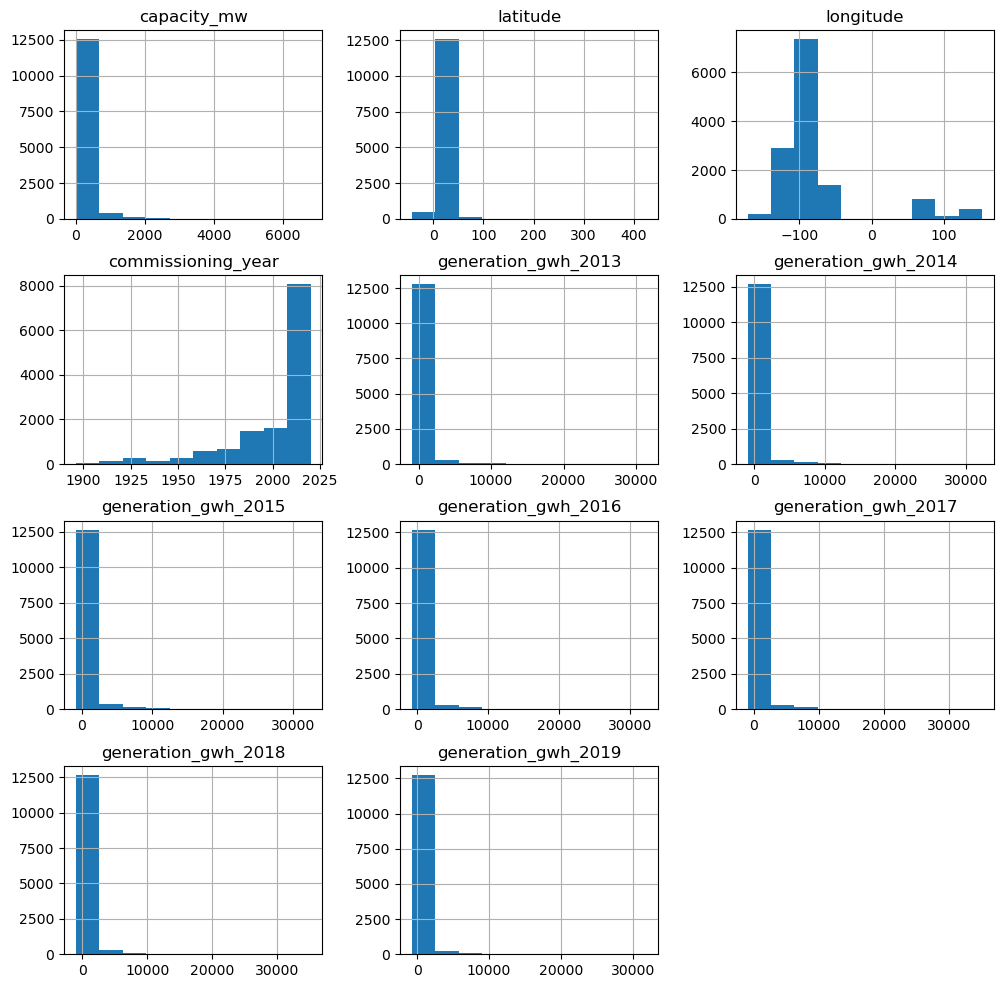

In [2619]:
Numerical=['capacity_mw', 'latitude', 'longitude', 'commissioning_year', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018','generation_gwh_2019']
df4[Numerical].hist(figsize=(12,12))
plt.show()

   - To check for skewness and outliers in numerical variables.

In [2620]:
print('The skewness of the variables are:\n')
df4[['capacity_mw', 'latitude', 'longitude', 'commissioning_year', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018','generation_gwh_2019']].skew()

The skewness of the variables are:



capacity_mw            5.459051
latitude              -1.850053
longitude              2.328446
commissioning_year    -1.944708
generation_gwh_2013    8.458157
generation_gwh_2014    7.997737
generation_gwh_2015    8.161552
generation_gwh_2016    8.232859
generation_gwh_2017    8.319090
generation_gwh_2018    8.257216
generation_gwh_2019    8.846119
dtype: float64

#### Observation:
- All the variables are highly skewed.

#### Next:
- To check outliers of the variables  using boxplot.

#### Boxplot

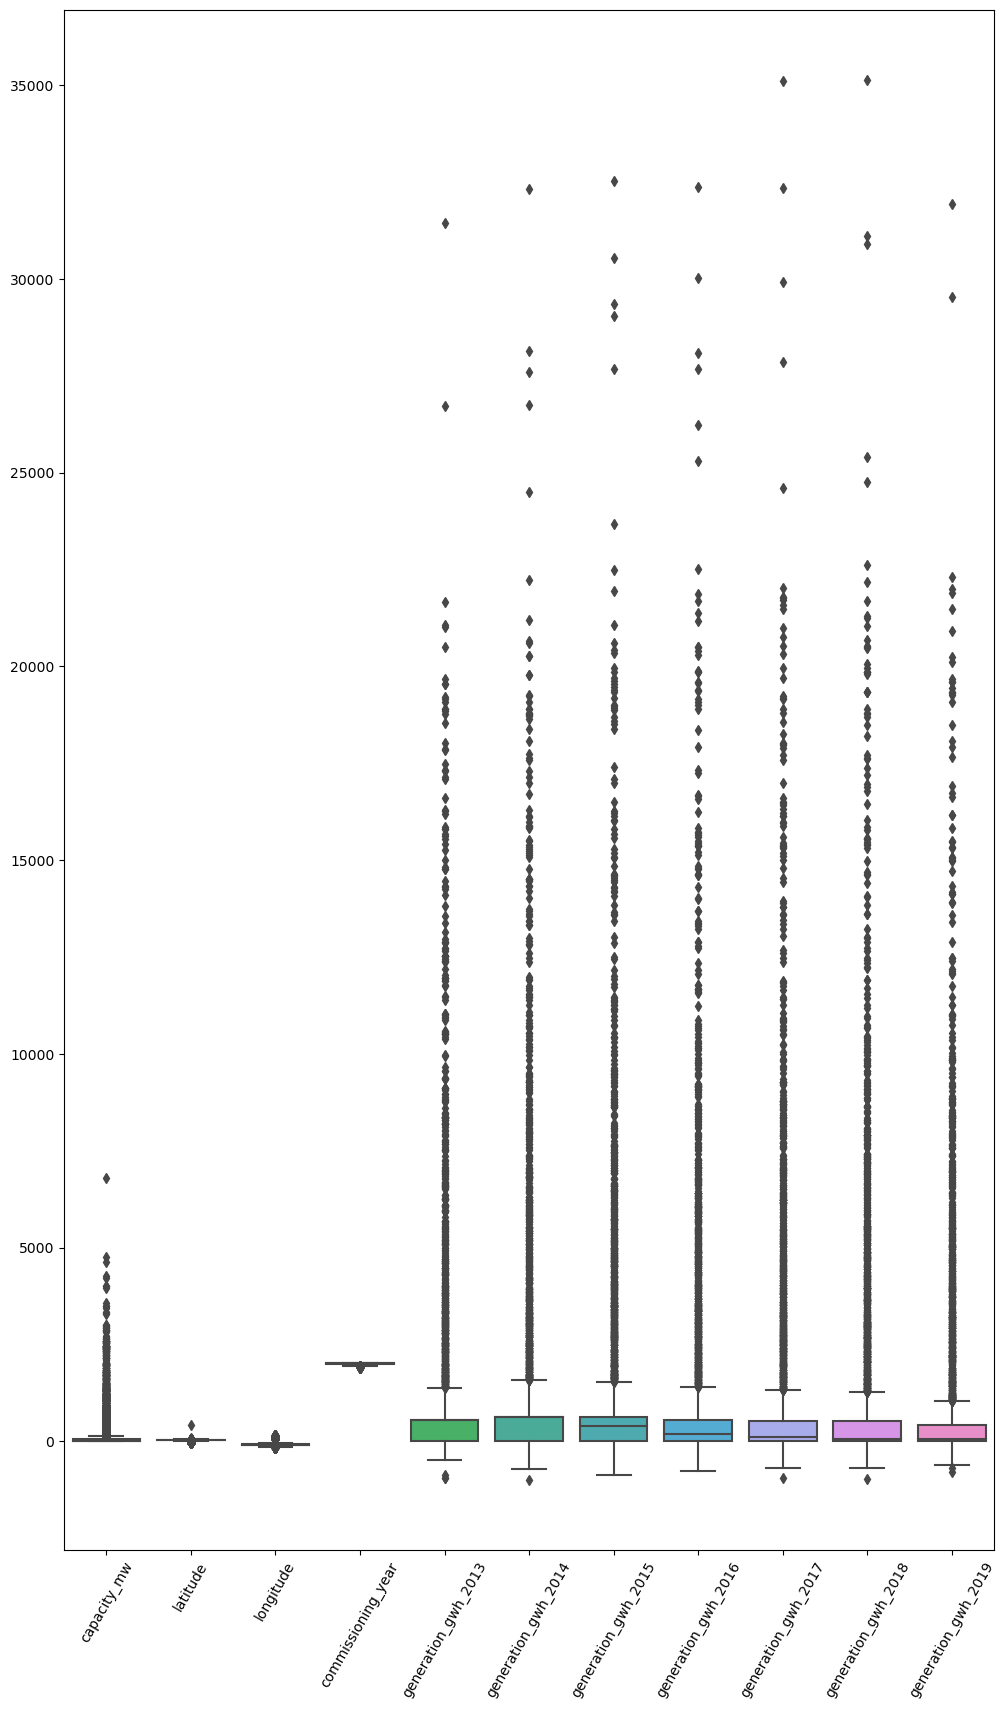

In [2621]:
plt.figure(figsize=(12,20))
# for i in Numerical:
sns.boxplot(data=df4[Numerical])
plt.xticks(rotation=60)
plt.show()

#### Observation:
- There are significant outliers.

#### Next:
- To explore the distribution of categorical variables using countplots.

#### Countplot

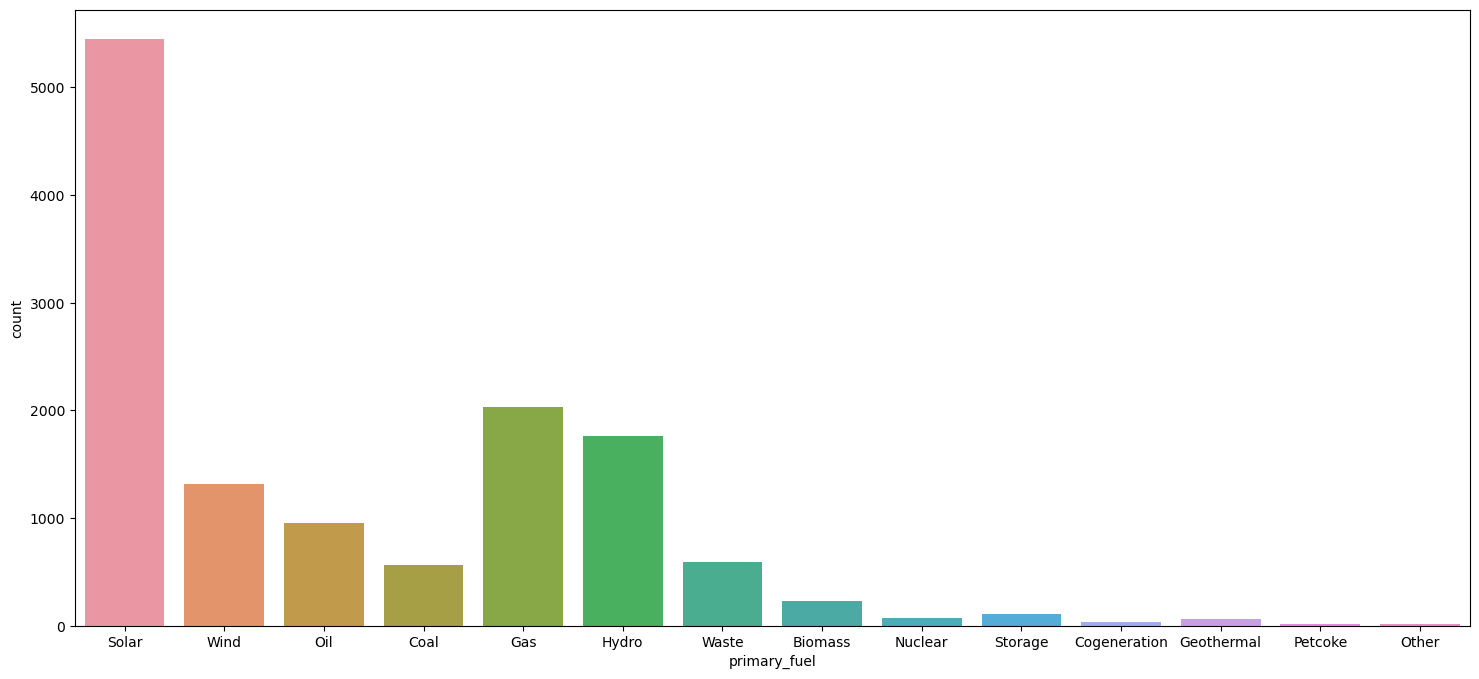

In [2622]:
plt.figure(figsize=(18, 8))
sns.countplot(x='primary_fuel', data=df4)
plt.xticks(rotation=0)
plt.show()

### (iv) Correlation Analysis:
   - To compute and visualize pairwise correlations between numerical variables using heatmap.
   - To identify highly correlated variables (correlation coefficient > 0.7 or < -0.7).

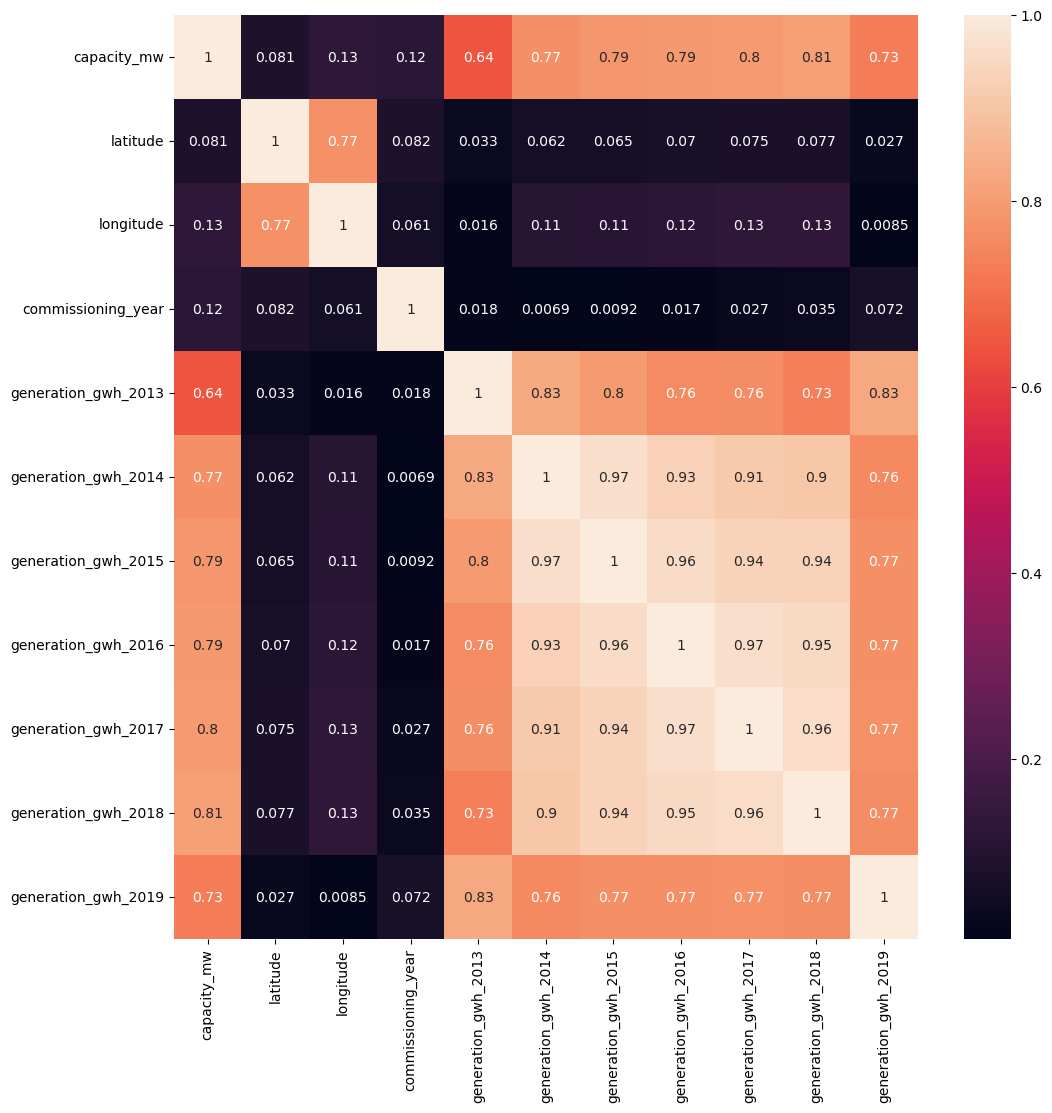

In [2623]:
# Heatmap for correlation coefficient
plt.figure(figsize=(12,12))
sns.heatmap(abs(df4[Numerical].corr()),annot=True)
plt.show()

#### Observation:
- Highly correlated variables with each other:  'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', and 'generation_gwh_2019' 


- 'capacity_mw' is higly correlated with each of 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', and 'generation_gwh_2019'

### (v) Feature Engineering:
   - To transform variables (using Box cox transformation) to address skewness.

In [2624]:
from scipy.stats import boxcox

# DataFrame to store transformed features
df4_skewed = pd.DataFrame()
df4_reset=df4[Numerical].reset_index(drop=True,inplace=False)   # reset index of df4df4.reset_index(drop=True, inplace=True)
print('Skewness of variables are:\n')
for i in ['capacity_mw','longitude', 'commissioning_year', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018','generation_gwh_2019']:
    
    df4_positive= df4_reset[i] - df4_reset[i].min() + 0.01             # Add a small constant to ensure positivity
    
    transformed_feature, lambda_value = boxcox(df4_positive)  
    
    df4_skewed[i] = transformed_feature
    
    # Compute skewness of the transformed feature
    skewness = pd.Series(transformed_feature).skew()
    
    print(f"{i}: {skewness:.3f}")


Skewness of variables are:

capacity_mw: -0.035
longitude: 0.022
commissioning_year: -0.771
generation_gwh_2013: 0.209
generation_gwh_2014: -0.342
generation_gwh_2015: -0.482
generation_gwh_2016: -0.615
generation_gwh_2017: -0.615
generation_gwh_2018: -0.643
generation_gwh_2019: -0.751


#### Observation: 
- Skewness of the variables have considerably reduced after the boxcox transformation

#### Next:
- To replace the variables by their transformed values

In [2625]:
df4_skewed.head()

,capacity_mw,longitude,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
0,-1.969324,5.952007,4.219413e+07,7.84784,6.658626,6.292735,5.997394,6.226257,6.246355,5.95706
1,0.009954,5.952182,5.169134e+07,7.84784,6.658626,6.292735,5.997394,6.226257,6.246355,5.95706
2,3.431691,5.877614,5.169134e+07,7.41754,6.335367,5.970646,5.697812,5.961762,6.005458,5.95706
3,-1.320668,5.935797,3.283854e+07,7.84784,6.658626,6.292735,5.997394,6.226257,6.246355,5.95706
4,1.459095,5.952798,4.836426e+07,7.84784,6.658626,6.292735,5.997394,6.226257,6.246355,5.95706


#### Dropping the variables 'capacity_mw','longitude', 'commissioning_year', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018','generation_gwh_2019' from df4

In [2626]:
df5=df4[['latitude','primary_fuel']]
df5.reset_index(drop=True, inplace=True)
df5.head()

,latitude,primary_fuel
0,-34.9387,Solar
1,-34.9453,Solar
2,-35.0641,Wind
3,-23.7966,Solar
4,-34.5509,Oil


#### Observation: 
- Variables dropped: 'capacity_mw','longitude', 'commissioning_year', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018','generation_gwh_2019'

#### Next:
- Concatenating the transformed values of these variables with df5

In [2627]:
df6=pd.concat([df5,df4_skewed],axis=1)
df6.head()

,latitude,primary_fuel,capacity_mw,longitude,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
0,-34.9387,Solar,-1.969324,5.952007,4.219413e+07,7.84784,6.658626,6.292735,5.997394,6.226257,6.246355,5.95706
1,-34.9453,Solar,0.009954,5.952182,5.169134e+07,7.84784,6.658626,6.292735,5.997394,6.226257,6.246355,5.95706
2,-35.0641,Wind,3.431691,5.877614,5.169134e+07,7.41754,6.335367,5.970646,5.697812,5.961762,6.005458,5.95706
3,-23.7966,Solar,-1.320668,5.935797,3.283854e+07,7.84784,6.658626,6.292735,5.997394,6.226257,6.246355,5.95706
4,-34.5509,Oil,1.459095,5.952798,4.836426e+07,7.84784,6.658626,6.292735,5.997394,6.226257,6.246355,5.95706


In [2628]:
df6[Numerical].skew()

capacity_mw           -0.035172
latitude              -1.850053
longitude              0.021800
commissioning_year    -0.771371
generation_gwh_2013    0.209058
generation_gwh_2014   -0.342458
generation_gwh_2015   -0.481577
generation_gwh_2016   -0.615022
generation_gwh_2017   -0.615346
generation_gwh_2018   -0.642661
generation_gwh_2019   -0.750850
dtype: float64

#### Observation:
- The transformed variables have been properly concatenated with the df5 data frame.

#### Next:
- To appropriately encode categorical variables('primary_fuel').

#### Categorical to numerical transformation:'primary_fuel'

In [2629]:
df6['primary_fuel'].unique().tolist()

C:\Users\admin\anaconda3\lib\site-packages\IPython\core\displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


['Solar',
 'Wind',
 'Oil',
 'Coal',
 'Gas',
 'Hydro',
 'Waste',
 'Biomass',
 'Nuclear',
 'Storage',
 'Cogeneration',
 'Geothermal',
 'Petcoke',
 'Other']

In [2630]:
len(['Solar','Wind','Oil','Coal','Gas','Hydro','Waste','Biomass','Nuclear','Storage','Cogeneration','Geothermal','Petcoke','Other'])

14

#### Observation:
- There are 14 unique values in the variable 'primary_fuel'. 

#### Next:
- To convert each of these unique values into numerical.

- As the variable 'primary_fuel' is the target label, therefore each unique value in them will be mapped against an integer.

In [2631]:
df6['primary_fuel']=df6['primary_fuel'].map({"Solar":0,"Gas":1,"Hydro":2,"Wind":3,"Oil":4,"Waste":5,"Coal":6,"Biomass":7,"Storage":8,"Nuclear":9,"Geothermal":10,"Cogeneration":11,"Other":12,"Petcoke":13})
df6.head()

,latitude,primary_fuel,capacity_mw,longitude,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
0,-34.9387,0,-1.969324,5.952007,4.219413e+07,7.84784,6.658626,6.292735,5.997394,6.226257,6.246355,5.95706
1,-34.9453,0,0.009954,5.952182,5.169134e+07,7.84784,6.658626,6.292735,5.997394,6.226257,6.246355,5.95706
2,-35.0641,3,3.431691,5.877614,5.169134e+07,7.41754,6.335367,5.970646,5.697812,5.961762,6.005458,5.95706
3,-23.7966,0,-1.320668,5.935797,3.283854e+07,7.84784,6.658626,6.292735,5.997394,6.226257,6.246355,5.95706
4,-34.5509,4,1.459095,5.952798,4.836426e+07,7.84784,6.658626,6.292735,5.997394,6.226257,6.246355,5.95706


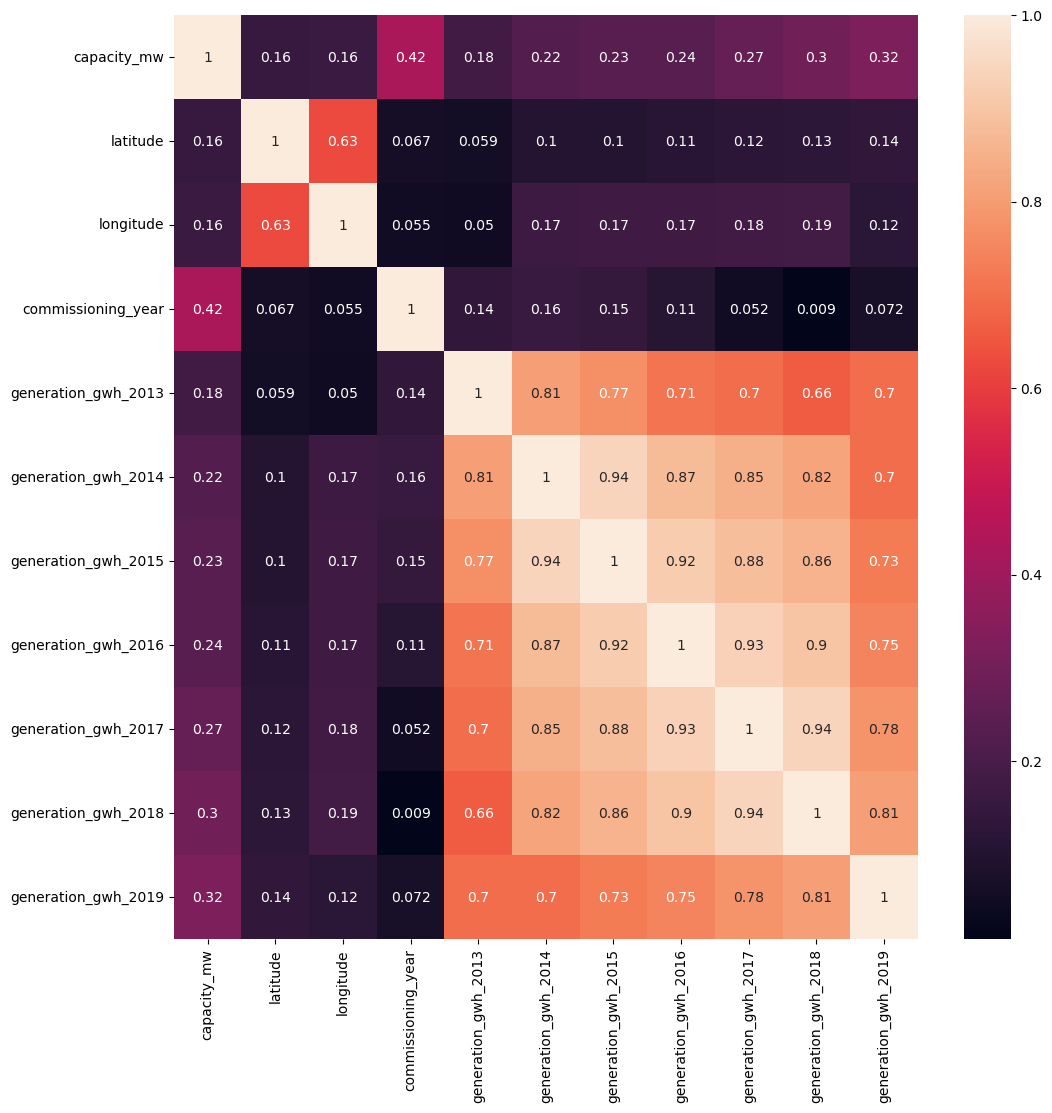

In [2632]:
plt.figure(figsize=(12,12))
sns.heatmap(abs(df6[Numerical].corr()),annot=True)
plt.show()

#### Observation:
- Boxcox transformation has helped to reduce the correlation of the variable 'capacity_mw' with each of 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', and 'generation_gwh_2019'


- However, there is still very high multicollinearity in variables: 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', and 'generation_gwh_2019'

#### Next:
- To reduce the multicollinearity of variables: 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', and 'generation_gwh_2019' 

### Variance Inflation Factor (VIF): To estimate the extent of multicollinearity

In [2633]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X=df6.drop(columns='primary_fuel',inplace=False)
y=df6['primary_fuel']
VIF=pd.DataFrame()
VIF["Features"]=X.columns
VIF["VIF value"]=[round(variance_inflation_factor(X.values, i),2) for i in range(len(X.columns))]
VIF

,Features,VIF value
0,latitude,8.70
1,capacity_mw,1.87
2,longitude,103.80
3,commissioning_year,7.70
4,generation_gwh_2013,896.98
5,generation_gwh_2014,3534.90
6,generation_gwh_2015,4225.05
7,generation_gwh_2016,3457.69
8,generation_gwh_2017,4894.00
9,generation_gwh_2018,3905.87


#### Observation: 
- Variable 'generation_gwh_2017' has the highest VIF value.

#### Next:
- Tree based models like Decision tree, Random forest, GradientBoost algorithms or Regularized regression model like ridge classifier, is also expected to work reasonably well in the presence of multicollinearity. 


- To check the scale of variation of different variables.

### Scaling of the variables

In [2634]:
X.describe()

,latitude,capacity_mw,longitude,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
count,13214.000000,13214.000000,13214.000000,1.321400e+04,13214.000000,13214.000000,13214.000000,13214.000000,13214.000000,13214.000000,13214.000000
mean,35.083697,2.182980,4.575192,3.678223e+07,7.700401,6.540283,6.164029,5.859690,6.103925,6.126404,5.835612
std,15.380971,3.565441,0.531386,1.760495e+07,0.480013,0.348941,0.343048,0.334783,0.322115,0.317472,0.307964
min,-42.888300,-3.931997,-4.472855,-2.505014e-01,-4.411613,-4.925005,-5.077919,-5.205658,-5.111227,-5.107822,-5.187137
25%,33.907475,0.418158,4.320054,2.138787e+07,7.332205,6.264800,5.898858,5.620779,5.900969,5.942156,5.656064
50%,38.392350,1.813533,4.562316,4.367784e+07,7.847840,6.658626,6.179162,5.771798,5.976965,5.983501,5.697841
75%,42.175275,4.584134,4.702059,5.169134e+07,7.847840,6.658626,6.292735,5.997394,6.226257,6.246355,5.957060
max,425.246100,12.244734,6.002469,5.699994e+07,11.467407,8.995257,8.445868,8.031034,8.382879,8.395422,8.079966


#### Observation
- All the variables are within similar range except "commissioning_year".

#### Next
- Using standard scaler to scale the variables

#### Standard Scaler

In [2635]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X1=scaler.fit_transform(X)
X2=pd.DataFrame(X1, columns=X.columns)
X2.describe()

,latitude,capacity_mw,longitude,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
count,1.321400e+04,1.321400e+04,1.321400e+04,1.321400e+04,1.321400e+04,1.321400e+04,1.321400e+04,1.321400e+04,1.321400e+04,1.321400e+04,1.321400e+04
mean,1.995696e-16,1.698730e-15,-9.799772e-16,2.436542e-18,4.963572e-16,3.100659e-15,1.539449e-15,2.271664e-15,4.870883e-15,-1.262465e-16,7.934011e-16
std,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00
min,-5.069572e+00,-1.715134e+00,-1.702790e+01,-2.089391e+00,-2.523361e+01,-3.285866e+01,-3.277204e+01,-3.305351e+01,-3.481855e+01,-3.538788e+01,-3.579365e+01
25%,-7.647542e-02,-4.949987e-01,-4.801554e-01,-8.744670e-01,-7.670813e-01,-7.895138e-01,-7.730165e-01,-7.136575e-01,-6.300966e-01,-5.803826e-01,-5.830376e-01
50%,2.151216e-01,-1.036228e-01,-2.423266e-02,3.917011e-01,3.071686e-01,3.391624e-01,4.411483e-02,-2.625460e-01,-3.941597e-01,-4.501441e-01,-4.473782e-01
75%,4.610793e-01,6.734777e-01,2.387553e-01,8.469026e-01,3.071686e-01,3.391624e-01,3.751984e-01,4.113374e-01,3.797935e-01,3.778458e-01,3.943713e-01
max,2.536753e+01,2.822129e+00,2.686053e+00,1.148454e+00,7.848008e+00,7.035774e+00,6.651918e+00,6.486063e+00,7.075240e+00,7.147418e+00,7.287984e+00


#### Observation:
- All the variables have mean within similar range

#### Next:
- Building the model

### To check if the classes are balanced or not

In [2636]:
y.value_counts()

0     5451
1     2030
2     1765
3     1320
4      954
5      595
6      567
7      230
8      104
9       72
10      65
11      34
12      16
13      11
Name: primary_fuel, dtype: int64

#### Observation:
- There is imbalance in classes present.
- Class 0, which represents solar is present in majority.

#### Next:
- To balance the classes using SMOTE

### SMOTE: To oversample additional minority classes to remove imbalance

In [2637]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
X2,y=SM.fit_resample(X2,y)

In [2638]:
y.value_counts()

0     5451
3     5451
4     5451
6     5451
1     5451
2     5451
5     5451
7     5451
9     5451
8     5451
11    5451
10    5451
13    5451
12    5451
Name: primary_fuel, dtype: int64

#### Observation
- All the classes are now balanced.

#### Next:
- Model building.

## Model building

In [2639]:
# Import Classification libraries
from sklearn.linear_model import LogisticRegression,RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score,GridSearchCV

#### To find the best random state

In [2640]:
from sklearn.model_selection import train_test_split
maxAcc=0
for i in range(1000):
    X_train,X_test,y_train,y_test = train_test_split(X2,y, test_size=0.3,random_state=i)
    LR=LogisticRegression()
    model=LR.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    Acc=accuracy_score(y_test,y_pred)
    if Acc>maxAcc:
        maxAcc=Acc
        random=i
print(f'Max accuracy: {round(maxAcc,2)}')
print(f'Best_random_state: {random}')

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Max accuracy: 0.47
Best_random_state: 163


C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Logistic Regression

In [2641]:
X_train,X_test,y_train,y_test = train_test_split(X2,y, test_size=0.3,random_state=random)
LR=LogisticRegression()
model_LR=LR.fit(X_train,y_train)
y_pred_LR=model_LR.predict(X_test)
Acc=accuracy_score(y_test,y_pred_LR)
y_pred_LR_train=model_LR.predict(X_train)
Acc_train=accuracy_score(y_train,y_pred_LR_train)
report=classification_report(y_test,y_pred_LR)
conf_matrix=confusion_matrix(y_test,y_pred_LR)
cv_score=cross_val_score(LR,X_train,y_train,cv=10).mean()  # performing 10 folds cross validation
print(f'Accuracy score : {round(Acc,2)}')
print(f'Accuracy score on training data: {round(Acc_train,2)}')
print(f'Cross validation score: {round(cv_score,2)}')
print(f'Classification report:\n {report}')

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Accuracy score : 0.47
Accuracy score on training data: 0.46
Cross validation score: 0.46
Classification report:
               precision    recall  f1-score   support

           0       0.53      0.55      0.54      1599
           1       0.32      0.27      0.29      1605
           2       0.33      0.45      0.38      1633
           3       0.43      0.50      0.46      1686
           4       0.40      0.36      0.38      1685
           5       0.36      0.38      0.37      1645
           6       0.59      0.55      0.57      1660
           7       0.53      0.33      0.40      1685
           8       0.59      0.80      0.68      1652
           9       0.84      0.85      0.84      1584
          10       0.50      0.43      0.46      1626
          11       0.62      0.13      0.21      1624
          12       0.26      0.41      0.32      1574
          13       0.49      0.58      0.53      1637

    accuracy                           0.47     22895
   macro avg       0.

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Observation:
- The accuracy is very poor because of presence of high multicollinearity

#### Next:
- To use regularized model, ridge classifier

### Ridge Classifier

In [2642]:
X_train,X_test,y_train,y_test = train_test_split(X2,y, test_size=0.3,random_state=random)
RR=RidgeClassifier()
model_RR=RR.fit(X_train,y_train)
y_pred_RR=model_RR.predict(X_test)
Acc=accuracy_score(y_test,y_pred_RR)
report=classification_report(y_test,y_pred_RR)
conf_matrix=confusion_matrix(y_test,y_pred_RR)
cv_score=cross_val_score(RR,X_train,y_train,cv=10).mean()  # performing 10 folds cross validation
print(f'Accuracy score : {round(Acc,2)}')
print(f'Cross validation score: {round(cv_score,2)}')
print(f'Classification report:\n {report}')

C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy score : 0.36
Cross validation score: 0.36
Classification report:
               precision    recall  f1-score   support

           0       0.29      0.62      0.40      1599
           1       0.30      0.10      0.15      1605
           2       0.23      0.64      0.33      1633
           3       0.39      0.57      0.46      1686
           4       0.84      0.02      0.05      1685
           5       0.08      0.00      0.00      1645
           6       0.56      0.39      0.46      1660
           7       0.45      0.26      0.33      1685
           8       0.49      0.82      0.61      1652
           9       0.61      0.83      0.70      1584
          10       0.39      0.32      0.35      1626
          11       0.00      0.00      0.00      1624
          12       0.08      0.08      0.08      1574
          13       0.41      0.43      0.42      1637

    accuracy                           0.36     22895
   macro avg       0.37      0.36      0.31     22895
weigh

#### Observation:
Ridge classifier has even poor accuracy.

### Decision Tree Classifier

In [2643]:
X_train,X_test,y_train,y_test = train_test_split(X2,y, test_size=0.3,random_state=random)
DT=DecisionTreeClassifier()
model_DT=DT.fit(X_train,y_train)
y_pred_DT=model_DT.predict(X_test)
Acc=accuracy_score(y_test,y_pred_DT)
report=classification_report(y_test,y_pred_DT)
conf_matrix=confusion_matrix(y_test,y_pred_DT)
cv_score=cross_val_score(DT,X_train,y_train,cv=10).mean()  # performing 10 folds cross validation
print(f'Accuracy score : {round(Acc,2)}')
print(f'Cross validation score: {round(cv_score,2)}')
print(f'Classification report:\n {report}')

Accuracy score : 0.92
Cross validation score: 0.92
Classification report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89      1599
           1       0.78      0.74      0.76      1605
           2       0.88      0.88      0.88      1633
           3       0.89      0.89      0.89      1686
           4       0.92      0.90      0.91      1685
           5       0.87      0.88      0.87      1645
           6       0.90      0.90      0.90      1660
           7       0.89      0.91      0.90      1685
           8       0.99      0.99      0.99      1652
           9       0.97      0.98      0.97      1584
          10       0.99      0.99      0.99      1626
          11       0.97      0.98      0.98      1624
          12       0.97      0.98      0.98      1574
          13       0.98      0.99      0.98      1637

    accuracy                           0.92     22895
   macro avg       0.92      0.92      0.92     22895
weigh

### Random Forest Classifier

In [2645]:
RF=RandomForestClassifier()
model_RF=RF.fit(X_train,y_train)
y_pred_RF=model_RF.predict(X_test)
Acc=accuracy_score(y_test,y_pred_RF)
report=classification_report(y_test,y_pred_RF)
conf_matrix=confusion_matrix(y_test,y_pred_RF)
cv_score=cross_val_score(RF,X_train,y_train,cv=10).mean()  # performing 10 folds cross validation
print(f'Accuracy score : {round(Acc,2)}')
print(f'Cross validation score: {round(cv_score,2)}')
print(f'Classification report:\n {report}')

Accuracy score : 0.97
Cross validation score: 0.96
Classification report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.94      1599
           1       0.94      0.83      0.88      1605
           2       0.94      0.95      0.95      1633
           3       0.95      0.94      0.95      1686
           4       0.94      0.96      0.95      1685
           5       0.94      0.96      0.95      1645
           6       0.97      0.97      0.97      1660
           7       0.95      0.98      0.96      1685
           8       1.00      1.00      1.00      1652
           9       0.99      0.99      0.99      1584
          10       0.99      1.00      0.99      1626
          11       0.99      1.00      1.00      1624
          12       0.99      1.00      0.99      1574
          13       1.00      1.00      1.00      1637

    accuracy                           0.97     22895
   macro avg       0.97      0.97      0.97     22895
weigh

### AdaBoost Classifier

In [2646]:
AB=AdaBoostClassifier()
model_AB=AB.fit(X_train,y_train)
y_pred_AB=model_AB.predict(X_test)
Acc=accuracy_score(y_test,y_pred_AB)
report=classification_report(y_test,y_pred_AB)
conf_matrix=confusion_matrix(y_test,y_pred_AB)
cv_score=cross_val_score(AB,X_train,y_train,cv=10).mean()  # performing 10 folds cross validation
print(f'Accuracy score : {round(Acc,2)}')
print(f'Cross validation score: {round(cv_score,2)}')
print(f'Classification report:\n {report}')

Accuracy score : 0.2919414719371042
Cross validation score: 0.3164602173686445
Classification report:
               precision    recall  f1-score   support

           0       0.34      0.70      0.45      1599
           1       0.32      0.02      0.04      1605
           2       0.39      0.29      0.33      1633
           3       0.35      0.05      0.08      1686
           4       0.72      0.64      0.68      1685
           5       0.10      0.41      0.16      1645
           6       0.30      0.66      0.41      1660
           7       0.12      0.00      0.00      1685
           8       0.91      0.67      0.77      1652
           9       0.09      0.01      0.01      1584
          10       0.05      0.01      0.02      1626
          11       0.18      0.29      0.22      1624
          12       0.62      0.08      0.14      1574
          13       0.25      0.23      0.24      1637

    accuracy                           0.29     22895
   macro avg       0.34      0.

### Gradient Boosting Classifier

In [2647]:
GB=GradientBoostingClassifier()
model_GB=GB.fit(X_train,y_train)
y_pred_GB=model_GB.predict(X_test)
Acc=accuracy_score(y_test,y_pred_GB)
report=classification_report(y_test,y_pred_GB)
conf_matrix=confusion_matrix(y_test,y_pred_GB)
cv_score=cross_val_score(GB,X_train,y_train,cv=10).mean()  # performing 10 folds cross validation
print(f'Accuracy score : {round(Acc,2)}')
print(f'Cross validation score: {round(cv_score,2)}')
print(f'Classification report:\n {report}')

Accuracy score : 0.86
Cross validation score: 0.87
Classification report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1599
           1       0.77      0.54      0.64      1605
           2       0.84      0.78      0.81      1633
           3       0.81      0.80      0.81      1686
           4       0.88      0.87      0.88      1685
           5       0.71      0.77      0.74      1645
           6       0.87      0.82      0.85      1660
           7       0.76      0.78      0.77      1685
           8       0.99      0.99      0.99      1652
           9       0.98      0.96      0.97      1584
          10       0.91      0.98      0.95      1626
          11       0.89      0.97      0.93      1624
          12       0.89      0.96      0.93      1574
          13       0.93      0.97      0.95      1637

    accuracy                           0.86     22895
   macro avg       0.86      0.86      0.86     22895
weigh

### Support Vector Classifier

In [2648]:
SV=SVC()
model_SV=SV.fit(X_train,y_train)
y_pred_SV=model_SV.predict(X_test)
Acc=accuracy_score(y_test,y_pred_SV)
report=classification_report(y_test,y_pred_SV)
conf_matrix=confusion_matrix(y_test,y_pred_SV)
cv_score=cross_val_score(SV,X_train,y_train,cv=10).mean()  # performing 10 folds cross validation
print(f'Accuracy score : {round(Acc,2)}')
print(f'Cross validation score: {round(cv_score,2)}')
print(f'Classification report:\n {report}')

Accuracy score : 0.71
Cross validation score: 0.7
Classification report:
               precision    recall  f1-score   support

           0       0.68      0.51      0.58      1599
           1       0.73      0.41      0.52      1605
           2       0.69      0.64      0.67      1633
           3       0.66      0.51      0.58      1686
           4       0.63      0.71      0.67      1685
           5       0.52      0.49      0.51      1645
           6       0.79      0.76      0.77      1660
           7       0.61      0.56      0.59      1685
           8       0.63      0.97      0.77      1652
           9       0.97      0.92      0.94      1584
          10       0.71      0.97      0.82      1626
          11       0.74      0.60      0.66      1624
          12       0.76      0.91      0.83      1574
          13       0.85      0.97      0.91      1637

    accuracy                           0.71     22895
   macro avg       0.71      0.71      0.70     22895
weight

### K Neighbors Classifier

In [2649]:
KN=KNeighborsClassifier()
model_KN=KN.fit(X_train,y_train)
y_pred_KN=model_KN.predict(X_test)
Acc=accuracy_score(y_test,y_pred_KN)
report=classification_report(y_test,y_pred_KN)
conf_matrix=confusion_matrix(y_test,y_pred_KN)
cv_score=cross_val_score(KN,X_train,y_train,cv=10).mean()  # performing 10 folds cross validation
print(f'Accuracy score : {round(Acc,2)}')
print(f'Cross validation score: {round(cv_score,2)}')
print(f'Classification report:\n {report}')

C:\Users\admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Accuracy score : 0.93
Cross validation score: 0.93
Classification report:
               precision    recall  f1-score   support

           0       0.88      0.83      0.85      1599
           1       0.91      0.74      0.82      1605
           2       0.93      0.89      0.91      1633
           3       0.90      0.90      0.90      1686
           4       0.90      0.93      0.91      1685
           5       0.90      0.94      0.92      1645
           6       0.93      0.95      0.94      1660
           7       0.90      0.94      0.92      1685
           8       0.94      0.99      0.96      1652
           9       0.98      0.99      0.98      1584
          10       0.98      1.00      0.99      1626
          11       0.98      1.00      0.99      1624
          12       0.98      1.00      0.99      1574
          13       0.98      1.00      0.99      1637

    accuracy                           0.93     22895
   macro avg       0.93      0.93      0.93     22895
weigh

C:\Users\admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


#### Observations:
- Among all the classification models "Random Forest Classifier" has the best accuracy (= 0.97). 

#### Next:

- Here, accuracy may be considered an appropriate metric to decide the performance of a classification model. This is because all the classes were balanced using SMOTE before training the model.


- Performing hyperparameter tuning of the best performing model

### Hyperparameter tuning of Random Forest Classifier using GridSearchCV

- Random forest classifier hyperparameters curriently in use

In [2653]:
from pprint import pprint
print('Parameters currently in use:\n')
pprint(RF.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


- Hyperparameter tuning of random forest model

In [2655]:
from sklearn.model_selection import GridSearchCV
hyp={'criterion': ['gini','entropy'],
    'max_depth':[2,6,10,14,18,20,22,24],  
    'max_features': ['auto'],
    'n_jobs': [-1],  # Utilize all available cores
    'min_samples_split':[2,3,5,10],
     'random_state': [random],
    'verbose': [0]}
grid_search=GridSearchCV(RF,param_grid=hyp,cv=5)
grid_search.fit(X_train,y_train)

print("Best parameters:", grid_search.best_params_)
print("Best estimators:", grid_search.best_estimator_)
print("Best score:", grid_search.best_score_)

Best parameters: {'criterion': 'entropy', 'max_depth': 24, 'max_features': 'auto', 'min_samples_split': 2, 'n_jobs': -1, 'random_state': 163, 'verbose': 0}
Best estimators: RandomForestClassifier(criterion='entropy', max_depth=24, n_jobs=-1,
                       random_state=163)
Best score: 0.9578802145194205


#### Observation: 
- The "Hypertuned Random Forest Classifier" (accuracy = 0.96) did not perform well compared to the default "Random Forest Classifier" (accuracy = 0.97). Therefore, the default random forest classifier will be saved as the final model.

#### Next:
- Saving the default random forest model

### Saving the final model: Random Forest Classifier

In [2657]:
import pickle
file_name='Global power plant.pkl'
pickle.dump(RF,open(file_name,'wb'))

### Loading the saved model

In [2658]:
loaded_model=pickle.load(open('Global power plant.pkl','rb'))
result=loaded_model.score(X_test,y_test)
print(round(result,2))

0.97
